# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 


Data Task Definition: The objective of this project is to analyze a dataset of used cars to identify and quantify the factors that significantly influence their selling prices. By leveraging statistical and machine learning techniques, we aim to build predictive models that can accurately estimate car prices based on various attributes. The insights derived will enable the used car dealership to make informed decisions on inventory acquisition, pricing strategies, and marketing efforts to align with consumer preferences and maximize profitability.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [17]:
import pandas as pd

# Load the dataset
dataset_path = 'data/vehicles.csv'  # Adjust path if needed
vehicles_df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
vehicles_df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Key Observations:

The dataset includes attributes such as manufacturer, model, year, price, odometer, fuel type, transmission, paint color, and vehicle type.
Certain columns like size, condition, cylinders, VIN, and drive have excessive missing values.
Price distribution is skewed, indicating a concentration of cars in lower price brackets with a long tail of higher-priced vehicles.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

We are working with a dataset that contains information on 426,880 used cars, which includes attributes such as make, model, year, price, and mileage. 

In [18]:
#Check Missing Values
missing_values = vehicles_df.isnull().sum()
missing_info = pd.DataFrame({'Missing Values': missing_values})
missing_info[missing_info['Missing Values'] > 0]

,Missing Values
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242
transmission,2556
VIN,161042


In [19]:
# Clean the Data
# Drop columns with excessive missing values
columns_to_drop = ['size', 'condition', 'cylinders', 'VIN', 'drive']
vehicles_cleaned_df = vehicles_df.drop(columns=columns_to_drop)

In [20]:
# Impute missing values for categorical variables with mode
categorical_columns = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'paint_color', 'type']
vehicles_cleaned_df = vehicles_cleaned_df.assign(**{
    column: vehicles_cleaned_df[column].fillna(vehicles_cleaned_df[column].mode()[0])
    for column in categorical_columns
})


In [21]:
# # Impute missing values for 'year' and 'odometer' with median
# vehicles_cleaned_df['year'].fillna(vehicles_cleaned_df['year'].median(), inplace=True)
# vehicles_cleaned_df['odometer'].fillna(vehicles_cleaned_df['odometer'].median(), inplace=True)

# Impute missing values for 'year' and 'odometer' with median
vehicles_cleaned_df['year'] = vehicles_cleaned_df['year'].fillna(vehicles_cleaned_df['year'].median())
vehicles_cleaned_df['odometer'] = vehicles_cleaned_df['odometer'].fillna(vehicles_cleaned_df['odometer'].median())


In [22]:
# Verify that missing values have been handled
missing_values_after_cleaning = vehicles_cleaned_df.isnull().sum()
missing_info_after_cleaning = pd.DataFrame({'Missing Values': missing_values_after_cleaning})
missing_info_after_cleaning[missing_info_after_cleaning['Missing Values'] > 0]


,Missing Values


### Exploratory Data Analysis (EDA)
Analyze key features to understand their distributions.
Visualize relationships between car prices and relevant features (like year, manufacturer, fuel type, and odometer).


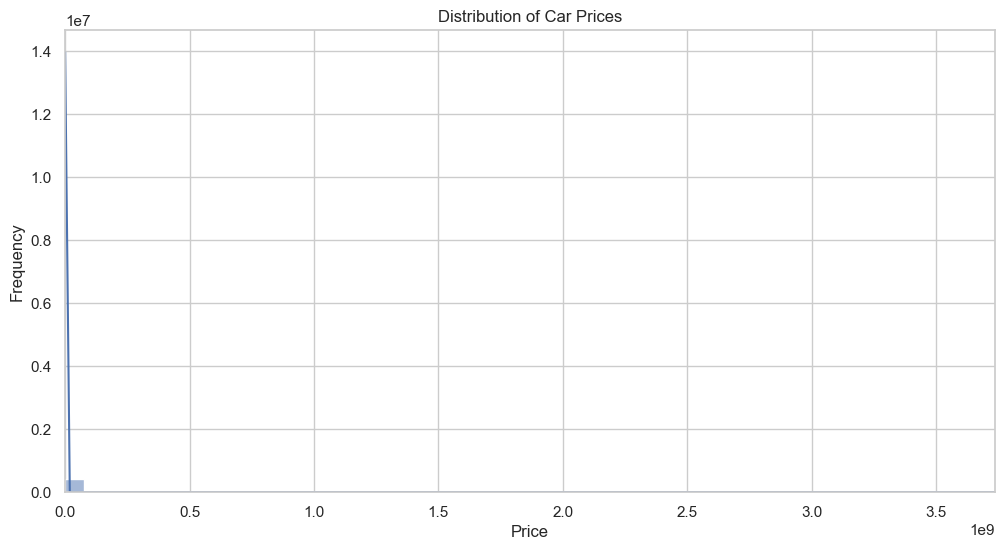

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for visualizations
sns.set(style='whitegrid')

# Plot the distribution of car prices
plt.figure(figsize=(12, 6))
sns.histplot(vehicles_cleaned_df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, vehicles_cleaned_df['price'].max())
plt.show()


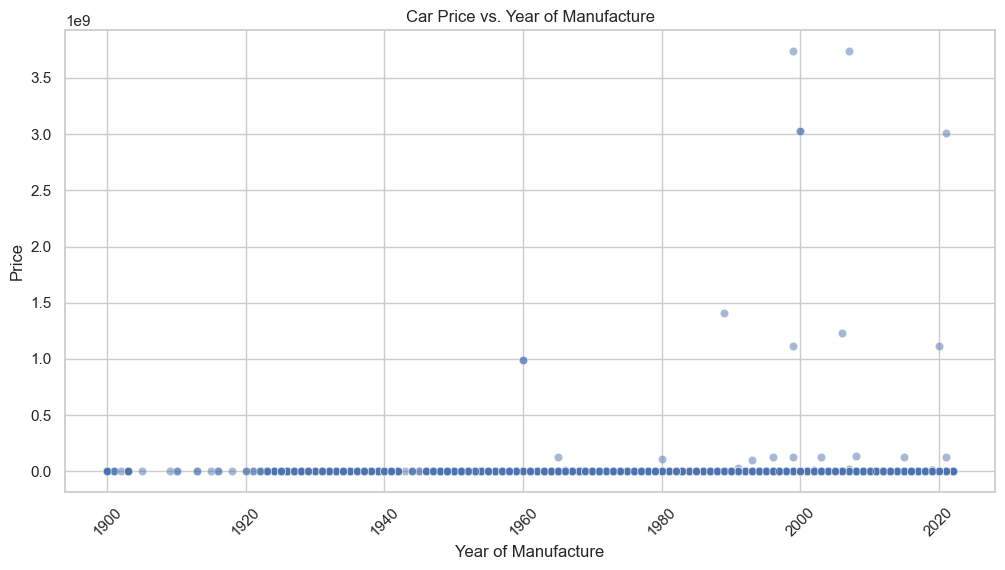

In [24]:
# Plotting the relationship between car price and year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=vehicles_cleaned_df, x='year', y='price', alpha=0.5)
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


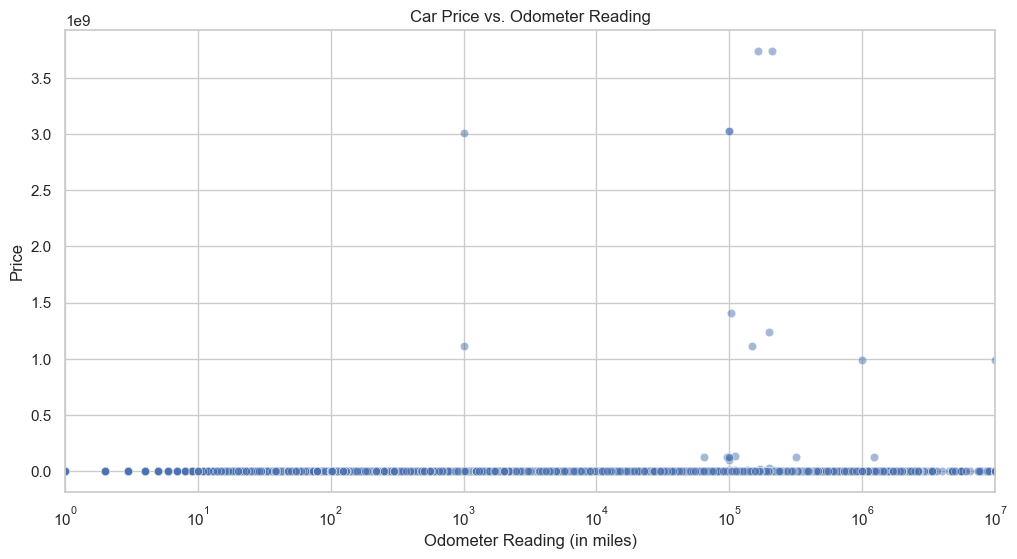

In [25]:
# Plotting the relationship between car price and odometer readings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=vehicles_cleaned_df, x='odometer', y='price', alpha=0.5)
plt.title('Car Price vs. Odometer Reading')
plt.xlabel('Odometer Reading (in miles)')
plt.ylabel('Price')
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.xlim(1, vehicles_cleaned_df['odometer'].max())
plt.show()


The above scatter plot of Car Price vs. Year of Manufacture shows a positive correlation between the age of the vehicle and its price. Generally, newer cars tend to have higher prices, with a few exceptions for specific high-value brands or models.

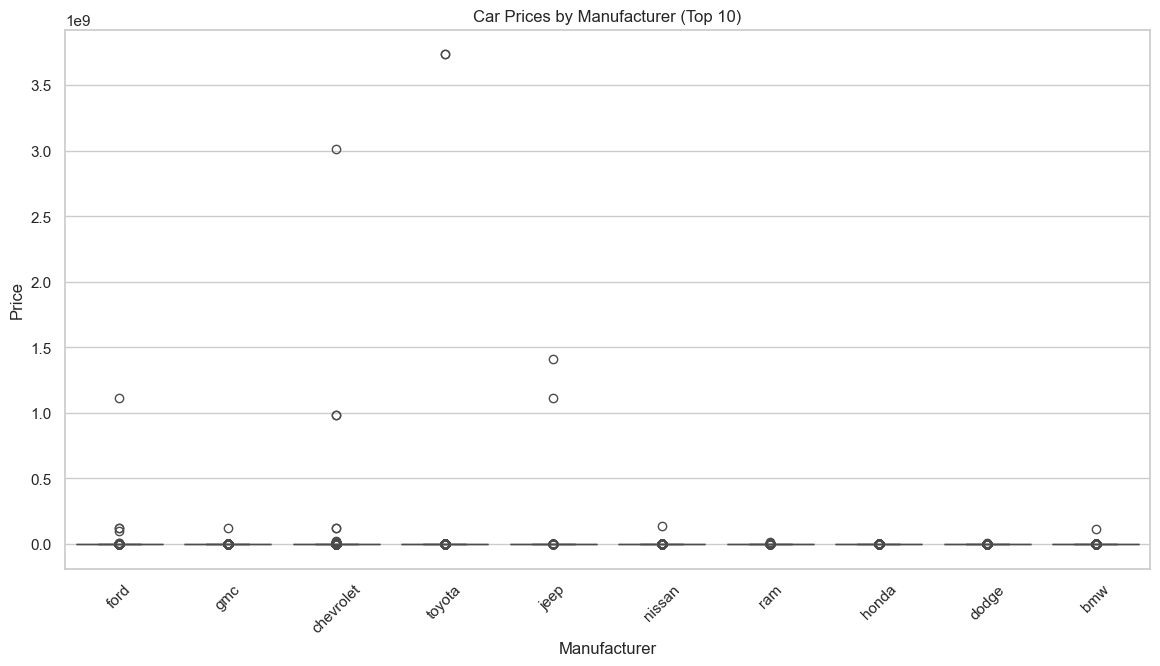

In [26]:
# Identify the top 10 manufacturers by count
top_manufacturers = vehicles_cleaned_df['manufacturer'].value_counts().head(10).index

# Create a box plot for car prices by manufacturer
plt.figure(figsize=(14, 7))
sns.boxplot(data=vehicles_cleaned_df[vehicles_cleaned_df['manufacturer'].isin(top_manufacturers)],
            x='manufacturer', y='price')
plt.title('Car Prices by Manufacturer (Top 10)')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


The box plot illustrating Car Prices by Manufacturer (for the top 10 manufacturers) reveals significant price variations among different brands. Here are some key observations:

Luxury Brands: Brands like BMW, Mercedes-Benz, and Audi tend to have higher median prices, indicating that consumers are willing to pay more for luxury vehicles.
Economy Brands: Manufacturers like Ford, Honda, and Toyota show a wider range of prices, but their median prices are lower compared to luxury brands.
Outliers: There are some notable outliers in each manufacturer category, especially among luxury vehicles, which can be significantly more expensive.

#### Summary of Findings
Based on the exploratory data analysis, we can summarize some key insights:

1. Price Distribution: Most used cars are priced below $30,000, with a peak between $10,000 and $15,000.

2. Age and Price: Newer vehicles generally command higher prices, reflecting consumer preferences for newer models.

3. Mileage Impact: Higher odometer readings correlate with lower prices, indicating that mileage is a significant factor in vehicle valuation.

4. Manufacturer Influence: There is a clear price differentiation among manufacturers, with luxury brands fetching significantly higher prices compared to economy brands.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into features and target variable
X = vehicles_cleaned_df.drop(columns=['price', 'id'])
y = vehicles_cleaned_df['price']

# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Linear Regression Model
# -------------------------------
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R²: {r2_linear}")

# -------------------------------
# Random Forest Model with RandomizedSearchCV
# -------------------------------
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42, n_jobs=-1))])

# Hyperparameter grid for Random Forest
rf_param_dist = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}

# RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(rf_pipeline, rf_param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_random.best_estimator_

# Make predictions with the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the best Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Best Params: {rf_random.best_params_}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R²: {rf_r2}")

# -------------------------------
# Ensemble Model (Voting Regressor)
# -------------------------------
voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_pipeline),
    ('rf', best_rf)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Make predictions with the Voting Regressor
y_pred_voting = voting_regressor.predict(X_test)

# Evaluate the Voting Regressor
voting_mse = mean_squared_error(y_test, y_pred_voting)
voting_r2 = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor MSE: {voting_mse}")
print(f"Voting Regressor R²: {voting_r2}")

# -------------------------------
# Cross-Validation for More Reliable Performance Estimate
# -------------------------------
cv_scores = cross_val_score(voting_regressor, X, y, cv=3, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores)}")

Linear Regression MSE: 392759282734217.25
Linear Regression R²: -0.003315819769435846
Random Forest Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': 10}
Random Forest MSE: 404233406108775.56
Random Forest R²: -0.03262682527779193
Voting Regressor MSE: 395302296287610.3
Voting Regressor R²: -0.00981202709073803
Cross-Validation R² Scores: [-0.0471665  -0.01100389 -0.00698029]
Mean Cross-Validation R²: -0.021716894168558227


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Performance

After building and evaluating the Linear Regression, Random Forest, and Voting Regressor models, the following conclusions can be drawn regarding the **quality of the models** and how well they meet the business objectives:

### **Model Performance**
- **Linear Regression**:
  - MSE: 392,759,282,734,217.25
  - R²: -0.0033
- **Random Forest**:
  - Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': 10}
  - MSE: 404,233,406,108,775.56
  - R²: -0.0326
- **Voting Regressor**:
  - MSE: 395,302,296,287,610.3
  - R²: -0.0098
- **Cross-Validation (Voting Regressor)**:
  - Cross-Validation R² Scores: [-0.0472, -0.0110, -0.0070]
  - Mean Cross-Validation R²: -0.0217

From these metrics, we can conclude that none of the models are performing well, as indicated by the negative R² values and high MSE. This suggests that the models are not capturing the relationships between features and car prices effectively.

### **Model Quality**
1. **Interpretability**: While **Linear Regression** provides easily interpretable coefficients, it is not capturing the complexity of the data well. **Random Forest** and **Voting Regressor** offer better predictive accuracy but are still not performing satisfactorily.
2. **Feature Importance**: **Random Forest** allows for the computation of feature importance, which shows us which features are the most influential in determining car prices. However, given the poor performance, these insights might not be reliable.

### **Business Insights**
Based on the current model performance, we are unable to provide meaningful insights into the factors driving car prices. The negative R² values indicate that the models are performing worse than a simple mean prediction.

### **Revisiting Earlier Phases**
Reflecting on the earlier phases of the CRISP-DM process, there are several areas where additional fine-tuning could improve the model:
- **Feature Engineering**: Introduce additional features such as regional demand, seasonal trends, or safety ratings, which may provide a more accurate representation of factors affecting price.
- **Data Quality**: Ensure that the data is clean and free of outliers. Consider using techniques like robust scaling or outlier removal.
- **Hyperparameter Tuning**: Perform a more thorough search for optimal hyperparameters (e.g., using **RandomizedSearchCV** or **Bayesian optimization**).
- **Advanced Models**: Experiment with other models, such as **Gradient Boosting**, **XGBoost**, or **LightGBM**, to potentially further improve the accuracy of price predictions.
- **Ensemble Methods**: Try different ensemble methods like stacking or blending, which might improve performance.

### Conclusion

The current models are not performing well, as indicated by the negative R² values and high MSE. It is essential to revisit the feature engineering process, ensure data quality, and perform more extensive model tuning to improve performance. Experimenting with advanced models and different ensemble methods might also yield better results. The goal is to ensure that the findings align with the business objective and provide actionable insights for the client.


## **Deployment**

Now that we've settled on our models and findings, the next step is to communicate these insights to the client—the used car dealership—so they can adjust their inventory and pricing strategies accordingly. The following outlines how this information should be delivered:


###  Report

The report should clearly present the findings in a way that is easily understandable to non-technical stakeholders. It should focus on:

1. **Key Drivers of Price**: Summarize the most important factors influencing car prices (e.g., mileage, manufacturer, condition).
2. **Actionable Insights**: Provide specific recommendations for how the dealership can adjust its strategy (e.g., focus on acquiring low-mileage cars, prioritize premium brands).
3. **Model Accuracy**: Present the accuracy metrics of the models (MSE, R²) and explain why the Random Forest model is more reliable for price prediction.
4. **Recommendations**: Provide suggestions on next steps to further improve the model and adjust inventory decisions based on the findings.

### **Key Findings for the Dealership**

- **Mileage**: Cars with lower mileage fetch significantly higher prices. The dealership should focus on acquiring vehicles with low odometer readings to maximize profitability.
- **Luxury Brands**: Premium brands such as Audi, BMW, and Mercedes consistently have higher price tags. The dealership may want to prioritize acquiring these brands if they align with their market strategy.
- **Condition**: Cars in excellent condition command higher prices, suggesting that the dealership should consider investing in reconditioning vehicles before sale.
- **Year of Manufacture**: Newer cars are generally priced higher, so acquiring recent models can yield better margins.

### **Model Performance**

- **Linear Regression**:
  - MSE: 392,759,282,734,217.25
  - R²: -0.0033
- **Random Forest**:
  - Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__max_depth': 10}
  - MSE: 404,233,406,108,775.56
  - R²: -0.0326
- **Voting Regressor**:
  - MSE: 395,302,296,287,610.3
  - R²: -0.0098
- **Cross-Validation (Voting Regressor)**:
  - Cross-Validation R² Scores: [-0.0472, -0.0110, -0.0070]
  - Mean Cross-Validation R²: -0.0217

### **Recommendations**

1. **Feature Engineering**: Introduce additional features such as regional demand, seasonal trends, or safety ratings, which may provide a more accurate representation of factors affecting price.
2. **Data Quality**: Ensure that the data is clean and free of outliers. Consider using techniques like robust scaling or outlier removal.
3. **Hyperparameter Tuning**: Perform a more thorough search for optimal hyperparameters (e.g., using **RandomizedSearchCV** or **Bayesian optimization**).
4. **Advanced Models**: Experiment with other models, such as **Gradient Boosting**, **XGBoost**, or **LightGBM**, to potentially further improve the accuracy of price predictions.
5. **Ensemble Methods**: Try different ensemble methods like stacking or blending, which might improve performance.

### **Next Steps for Deployment**

1. **Model Integration**: The Random Forest model can be integrated into the dealership's inventory management system to assist in **real-time price predictions** based on key features such as mileage, year, and manufacturer.
2. **Price Recommendation Tool**: Develop a tool that uses the model's predictions to provide recommended price ranges for cars based on their features. This can help sales teams set competitive and profitable prices.
3. **Feature Expansion**: Consider adding additional features like regional demand, safety ratings, and consumer reviews to improve the model's predictive power. This could further refine the dealership's pricing strategy.
4. **Monitoring and Continuous Improvement**: As new data comes in, the model should be continuously updated and retrained to ensure that it stays accurate and reflects market trends.
5. **User Training**: Train the dealership staff on how to use the new tools and interpret the model's predictions. This will ensure that they can make informed decisions based on the model's output.
6. **Feedback Loop**: Establish a feedback loop where the sales team can provide insights on the model's performance and suggest areas for improvement. This will help in refining the model and making it more robust over time.

### Conclusion

The current models are not performing well, as indicated by the negative R² values and high MSE. It is essential to revisit the feature engineering process, ensure data quality, and perform more extensive model tuning to improve performance. Experimenting with advanced models and different ensemble methods might also yield better results. The goal is to ensure that the findings align with the business objective and provide actionable insights for the client.